In [85]:
# Data Modelling - Using Logistic Regression

In [86]:
# The key idea is to identify valuable customers by using profit from a customer as a measure. 
#In our scenario weconvert our problem into classification problem by creating a feature profit_binary. 
#Profit_binary is set to 1 if the profit from the customer is more than mean value. and set to 0 if it is less than profit mean value
#In our data modelling step we will predict if the profit from a customer is greater than the average profit or less than it.

In [87]:
import pandas as pd
import numpy as np

In [88]:
customer_input_train = pd.read_csv('X_train.csv')
customer_input_test = pd.read_csv('X_test.csv')
customer_target_train = pd.read_csv('Y_train.csv')
customer_target_test = pd.read_csv('Y_test.csv')

In [89]:
# All Categorical columns will have a worst category(least Weight of Evidence) in them which we dont include for analysis and keep them as ref_categories.
# If all the categories of a predictor are 0 then it means the one in ref_category has a value 1.

In [90]:
input_with_ref_Categories = customer_input_train.reindex(columns = ['gender:F', 'gender:M', 'wealth_segment:Affluent Customer',
       'wealth_segment:High Net Worth', 'wealth_segment:Mass Customer',
       'owns_car:No', 'owns_car:Yes', 'state:NSW', 'state:QLD',
       'state:VIC', 'job_industry_category:Financial Services',
       'job_industry_category:Manufacturing',
       'job_industry_category:Retail',
       'job_industry_category:Telecommunications',
       'job_industry_category:unknown_category',
       'job_industry_category : IT_Retail',
       'job_industry_category : Health_Entertainment',
       'job_industry_category:Agri_property', 'Age:15-16', 'Age:17',
       'Age:18-20', 'Age:21-24', 'Age:25-26', 'Age:27-28', 'Age:29-32',
       'Age:33-35', 'Age:36', 'Age:37-41', 'Age:42', 'Age:43-45',
       'Age:46-48', 'Age:49-51', 'Age:52', 'Age:53-55', 'Age:56-59',
       'Age:60', 'Age:61-64', 'Age:>=65', 'property_valuation : 1',
       'property_valuation : 2-3', 'property_valuation : 4',
       'property_valuation : 5-6', 'property_valuation : 7-9',
       'property_valuation : 10-12', 'property_valuation : 12',
       'tenure:1-3', 'tenure:4-6', 'tenure:7-11', 'tenure:12-13',
       'tenure:14', 'tenure:15', 'tenure:16-18', 'tenure:19',
       'tenure:>=20', 'past_3_years_bike_related_purchases:0-2',
       'past_3_years_bike_related_purchases:3-9',
       'past_3_years_bike_related_purchases:10',
       'past_3_years_bike_related_purchases:11-13',
       'past_3_years_bike_related_purchases:14-15',
       'past_3_years_bike_related_purchases:16',
       'past_3_years_bike_related_purchases:17-18',
       'past_3_years_bike_related_purchases:19',
       'past_3_years_bike_related_purchases:20',
       'past_3_years_bike_related_purchases:21',
       'past_3_years_bike_related_purchases:22-26',
       'past_3_years_bike_related_purchases:27-28',
       'past_3_years_bike_related_purchases:29-33',
       'past_3_years_bike_related_purchases:34-38',
       'past_3_years_bike_related_purchases:39',
       'past_3_years_bike_related_purchases:40-47',
       'past_3_years_bike_related_purchases:48-50',
       'past_3_years_bike_related_purchases:51',
       'past_3_years_bike_related_purchases:52-55',
       'past_3_years_bike_related_purchases:56',
       'past_3_years_bike_related_purchases:57-61',
       'past_3_years_bike_related_purchases:62-66',
       'past_3_years_bike_related_purchases:67-68',
       'past_3_years_bike_related_purchases:69-77',
       'past_3_years_bike_related_purchases:78',
       'past_3_years_bike_related_purchases:79-80',
       'past_3_years_bike_related_purchases:81',
       'past_3_years_bike_related_purchases:82-85',
       'past_3_years_bike_related_purchases:86-87',
       'past_3_years_bike_related_purchases:88',
       'past_3_years_bike_related_purchases:89',
       'past_3_years_bike_related_purchases:90',
       'past_3_years_bike_related_purchases:91',
       'past_3_years_bike_related_purchases:92-95',
       'past_3_years_bike_related_purchases:96',
       'past_3_years_bike_related_purchases:97-98',
       'past_3_years_bike_related_purchases:99'])

In [91]:
ref_categories = ['gender:M','tenure:>=20','Age:>=65','property_valuation : 2-3','past_3_years_bike_related_purchases:22-26','job_industry_category:Telecommunications','state:QLD','owns_car:No','wealth_segment:Affluent Customer']

In [92]:
# We drop all the worst category values

In [93]:
input_train = input_with_ref_Categories.drop(ref_categories,axis = 1)

In [94]:
input_train

,gender:F,wealth_segment:High Net Worth,wealth_segment:Mass Customer,owns_car:Yes,state:NSW,state:VIC,job_industry_category:Financial Services,job_industry_category:Manufacturing,job_industry_category:Retail,job_industry_category:unknown_category,...,past_3_years_bike_related_purchases:82-85,past_3_years_bike_related_purchases:86-87,past_3_years_bike_related_purchases:88,past_3_years_bike_related_purchases:89,past_3_years_bike_related_purchases:90,past_3_years_bike_related_purchases:91,past_3_years_bike_related_purchases:92-95,past_3_years_bike_related_purchases:96,past_3_years_bike_related_purchases:97-98,past_3_years_bike_related_purchases:99
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,0,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2612,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2613,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2614,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# The above procedurer is done for target/ test dataset

In [96]:
target_with_ref_Categories = customer_target_train.reindex(columns = ['gender:F', 'gender:M', 'wealth_segment:Affluent Customer',
       'wealth_segment:High Net Worth', 'wealth_segment:Mass Customer',
       'owns_car:No', 'owns_car:Yes', 'state:NSW', 'state:QLD',
       'state:VIC', 'job_industry_category:Financial Services',
       'job_industry_category:Manufacturing',
       'job_industry_category:Retail',
       'job_industry_category:Telecommunications',
       'job_industry_category:unknown_category',
       'job_industry_category : IT_Retail',
       'job_industry_category : Health_Entertainment',
       'job_industry_category:Agri_property', 'Age:15-16', 'Age:17',
       'Age:18-20', 'Age:21-24', 'Age:25-26', 'Age:27-28', 'Age:29-32',
       'Age:33-35', 'Age:36', 'Age:37-41', 'Age:42', 'Age:43-45',
       'Age:46-48', 'Age:49-51', 'Age:52', 'Age:53-55', 'Age:56-59',
       'Age:60', 'Age:61-64', 'Age:>=65', 'property_valuation : 1',
       'property_valuation : 2-3', 'property_valuation : 4',
       'property_valuation : 5-6', 'property_valuation : 7-9',
       'property_valuation : 10-12', 'property_valuation : 12',
       'tenure:1-3', 'tenure:4-6', 'tenure:7-11', 'tenure:12-13',
       'tenure:14', 'tenure:15', 'tenure:16-18', 'tenure:19',
       'tenure:>=20', 'past_3_years_bike_related_purchases:0-2',
       'past_3_years_bike_related_purchases:3-9',
       'past_3_years_bike_related_purchases:10',
       'past_3_years_bike_related_purchases:11-13',
       'past_3_years_bike_related_purchases:14-15',
       'past_3_years_bike_related_purchases:16',
       'past_3_years_bike_related_purchases:17-18',
       'past_3_years_bike_related_purchases:19',
       'past_3_years_bike_related_purchases:20',
       'past_3_years_bike_related_purchases:21',
       'past_3_years_bike_related_purchases:22-26',
       'past_3_years_bike_related_purchases:27-28',
       'past_3_years_bike_related_purchases:29-33',
       'past_3_years_bike_related_purchases:34-38',
       'past_3_years_bike_related_purchases:39',
       'past_3_years_bike_related_purchases:40-47',
       'past_3_years_bike_related_purchases:48-50',
       'past_3_years_bike_related_purchases:51',
       'past_3_years_bike_related_purchases:52-55',
       'past_3_years_bike_related_purchases:56',
       'past_3_years_bike_related_purchases:57-61',
       'past_3_years_bike_related_purchases:62-66',
       'past_3_years_bike_related_purchases:67-68',
       'past_3_years_bike_related_purchases:69-77',
       'past_3_years_bike_related_purchases:78',
       'past_3_years_bike_related_purchases:79-80',
       'past_3_years_bike_related_purchases:81',
       'past_3_years_bike_related_purchases:82-85',
       'past_3_years_bike_related_purchases:86-87',
       'past_3_years_bike_related_purchases:88',
       'past_3_years_bike_related_purchases:89',
       'past_3_years_bike_related_purchases:90',
       'past_3_years_bike_related_purchases:91',
       'past_3_years_bike_related_purchases:92-95',
       'past_3_years_bike_related_purchases:96',
       'past_3_years_bike_related_purchases:97-98',
       'past_3_years_bike_related_purchases:99'])

In [97]:
input_test = target_with_ref_Categories.drop(ref_categories, axis = 1)

In [98]:
# Building logistic regression model

In [99]:
from sklearn.linear_model import LogisticRegression


In [100]:
reg = LogisticRegression()

In [101]:
customer_input_test = customer_input_test.drop(['Unnamed: 0'], axis = 1)

In [102]:
customer_input_test

,profit_binary
0,1
1,0
2,1
3,1
4,0
...,...
2611,0
2612,1
2613,1
2614,1


In [103]:
reg.fit(input_train,customer_input_test)

C:\Users\Balamre\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [104]:
reg.coef_

array([[-1.27081580e-01,  8.65513300e-02,  9.71048346e-02,
         1.13016762e-02,  3.28501141e-02,  9.13444628e-02,
         1.54345568e-01,  7.64468772e-03, -7.38343200e-02,
         1.01504107e-01,  1.62525127e-01,  1.29484683e-01,
        -1.82925976e-02,  3.69701242e-01, -4.42903900e-01,
         1.30035832e-02,  1.02146102e-01, -2.54064259e-01,
        -2.20996071e-01,  9.06117219e-02,  2.49628709e-01,
         5.33138962e-01,  2.33566059e-01,  2.77063038e-04,
        -1.51266722e-01, -2.76261062e-03,  2.87464502e-01,
        -2.52900819e-01,  1.58565299e-01,  2.30843637e-01,
        -3.63726336e-01,  1.91478919e-01, -3.15612943e-01,
        -9.76069532e-02, -3.84716044e-01, -3.04416990e-01,
        -5.47796337e-01,  1.70706511e-01, -3.63557989e-02,
        -8.51684833e-02, -8.18764090e-02,  2.43753368e-01,
        -4.09907094e-01,  5.48427064e-02, -1.51982748e-01,
         2.73726275e-01,  1.78891713e-01, -1.25810984e-01,
         3.00066307e-01,  4.91692997e-01, -8.34417254e-0

In [105]:
reg.intercept_

array([0.05816139])

In [106]:
# To obtain co-efficient and p values of each predictor we use the below built in functionalities

In [107]:
# If p-values are significantly less i.e <0.005 then that predictor is of high importance for predicting the target variable

In [108]:
import statsmodels.api as sm
from scipy import stats

In [109]:
X = input_train
y = customer_input_test
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.672319
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          profit_binary   No. Observations:                 2616
Model:                          Logit   Df Residuals:                     2534
Method:                           MLE   Df Model:                           81
Date:                Wed, 03 Mar 2021   Pseudo R-squ.:                 0.02992
Time:                        16:48:02   Log-Likelihood:                -1758.8
converged:                       True   LL-Null:                       -1813.0
Covariance Type:            nonrobust   LLR p-value:                   0.02249
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
gender:F                                

In [110]:
# Below is a function used to calculate p values and co-efficient 

In [111]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [112]:
reg_p = LogisticRegression_with_p_values()

In [113]:
reg_p.fit(input_train,customer_input_test)

C:\Users\Balamre\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [114]:
feature_names = input_train.columns.values

In [115]:
# Function for displaying a summary table

In [116]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_names)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.058161
1,gender:F,-0.127082
2,wealth_segment:High Net Worth,0.086551
3,wealth_segment:Mass Customer,0.097105
4,owns_car:Yes,0.011302
...,...,...
78,past_3_years_bike_related_purchases:91,-0.066640
79,past_3_years_bike_related_purchases:92-95,-0.187137
80,past_3_years_bike_related_purchases:96,-0.002440
81,past_3_years_bike_related_purchases:97-98,0.256862


In [117]:
p_values = reg_p.p_values

In [118]:
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values

In [119]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.058161,NaN
1,gender:F,-0.127082,0.118034
2,wealth_segment:High Net Worth,0.086551,0.449748
3,wealth_segment:Mass Customer,0.097105,0.327392
4,owns_car:Yes,0.011302,0.888959
...,...,...,...
78,past_3_years_bike_related_purchases:91,-0.066640,0.892378
79,past_3_years_bike_related_purchases:92-95,-0.187137,0.497381
80,past_3_years_bike_related_purchases:96,-0.002440,0.995331
81,past_3_years_bike_related_purchases:97-98,0.256862,0.409027


In [120]:
#tenure:19	0.763337	0.026686
#47	past_3_years_bike_related_purchases:0-2	0.618285	0.095478

In [121]:
# As p values of all features are high and none of them are significant contributors we include all the context based relevant predictors into the model


In [122]:
y_hat_test = reg_p.model.predict(input_test)

In [123]:
y_hat_test

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,

In [124]:
customer_target_temp = customer_target_test

In [125]:
customer_target_temp

,Unnamed: 0,profit_binary
0,3382,0
1,304,1
2,81,0
3,1631,0
4,2836,1
...,...,...
867,277,0
868,954,0
869,3184,1
870,840,0


In [126]:
customer_target_temp.reset_index(drop = True,inplace = True)

In [127]:
customer_target_temp = customer_target_temp.drop(['Unnamed: 0'],axis = 1)

In [128]:
customer_target_temp

,profit_binary
0,0
1,1
2,0
3,0
4,1
...,...
867,0
868,0
869,1
870,0


In [129]:
# predict_proba is used to find actual probability value

In [130]:
y_hat_test_proba = reg_p.model.predict_proba(input_test)

In [131]:
y_hat_test_proba = y_hat_test_proba[ : ][: , 1]

In [132]:
df_actual_predicted_probs = pd.concat([customer_target_temp,pd.DataFrame(y_hat_test_proba)],axis = 1)


In [133]:
df_actual_predicted_probs.columns = ['customer_target_temp','y_hat_test_proba']

In [134]:
df_actual_predicted_probs.index = input_test.index

In [256]:
tr = 0.5
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test_new'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [257]:
# Confusion matrix

In [258]:
pd.crosstab(df_actual_predicted_probs['customer_target_temp'],df_actual_predicted_probs['y_hat_test_new'],rownames = ['actual'],colnames = ['predicted'])

predicted,0,1
actual,,
0,268,164
1,216,224


In [259]:
# ROC curve evaluation

In [260]:
from sklearn.metrics import roc_curve, roc_auc_score

In [261]:
roc_curve(df_actual_predicted_probs['customer_target_temp'],df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , 0.00231481, 0.00231481,
        0.00462963, 0.00462963, 0.00694444, 0.00694444, 0.00925926,
        0.00925926, 0.01388889, 0.01388889, 0.0162037 , 0.0162037 ,
        0.01851852, 0.01851852, 0.02083333, 0.02083333, 0.02314815,
        0.02314815, 0.02777778, 0.02777778, 0.03472222, 0.03472222,
        0.03703704, 0.03703704, 0.04166667, 0.04166667, 0.04861111,
        0.04861111, 0.05092593, 0.05092593, 0.05787037, 0.05787037,
        0.06018519, 0.06018519, 0.0625    , 0.0625    , 0.06481481,
        0.06481481, 0.06712963, 0.06712963, 0.06944444, 0.06944444,
        0.07175926, 0.07175926, 0.07407407, 0.07407407, 0.07638889,
        0.07638889, 0.08101852, 0.08101852, 0.08333333, 0.08333333,
        0.08564815, 0.08564815, 0.08796296, 0.08796296, 0.09027778,
        0.09027778, 0.09259259, 0.09259259, 0.09490741, 0.09490741,
        0.09722222, 0.09722222, 0.09953704, 0.09953704, 0.10648148,
        0.10648148, 0.1087963 , 0.1087963 , 0.11

In [262]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['customer_target_temp'],df_actual_predicted_probs['y_hat_test_proba'])

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

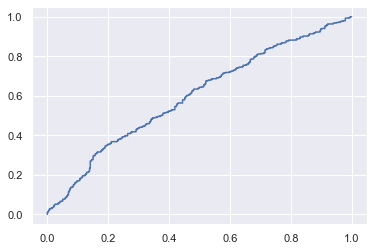

In [264]:
plt.plot(fpr,tpr)

Text(0.5, 1.0, 'ROC curve')

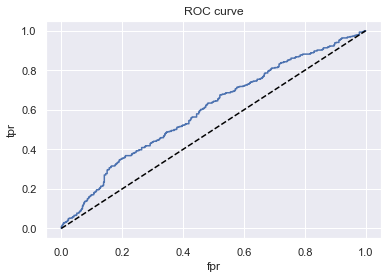

In [265]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle = '--', color = 'black')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

In [266]:
AUroc = roc_auc_score(df_actual_predicted_probs['customer_target_temp'],df_actual_predicted_probs['y_hat_test_proba'])
AUroc

0.5977351641414141

In [267]:
# 0.59/ about 60% is an average performance, so we try to reduce the predictors and see if the performance improves

In [268]:
ref_categories2 = ['tenure:12-13',
'past_3_years_bike_related_purchases:16',
'past_3_years_bike_related_purchases:91',
'past_3_years_bike_related_purchases:99',
'past_3_years_bike_related_purchases:21',
'wealth_segment:High Net Worth',
'past_3_years_bike_related_purchases:48-50',
'tenure:7-11',
'Age:56-59',
'Age:61-64',
'property_valuation : 4',
'past_3_years_bike_related_purchases:97-98',
'Age:21-24',
'Age:37-41',
'job_industry_category:Retail',
'wealth_segment:Mass Customer',
'Age:53-55',
'past_3_years_bike_related_purchases:92-95',
'past_3_years_bike_related_purchases:88',
'Age:49-51',
'Age:43-45',
'Age:15-16',
'past_3_years_bike_related_purchases:20',
'property_valuation : 7-9',
'job_industry_category : IT_Retail',
'Age:27-28',
'past_3_years_bike_related_purchases:39',
'state:NSW',
'property_valuation : 12',
'past_3_years_bike_related_purchases:14-15',
'job_industry_category:Manufacturing',
'past_3_years_bike_related_purchases:52-55',
'tenure:1-3',
'job_industry_category:unknown_category',
'past_3_years_bike_related_purchases:57-61',
'past_3_years_bike_related_purchases:67-68',
'property_valuation : 1',
'tenure:15',
'past_3_years_bike_related_purchases:17-18',
'tenure:14',
'Age:18-20',
'property_valuation : 10-12',
'owns_car:Yes',
'past_3_years_bike_related_purchases:10',
'Age:29-32',
'job_industry_category:Agri_property',
'state:VIC',
'Age:42',
'past_3_years_bike_related_purchases:90',
'past_3_years_bike_related_purchases:96',
'Age:25-26',
'Age:46-48',
'tenure:4-6',
'property_valuation : 5-6',
'job_industry_category:Financial Services',
'Age:52',
'job_industry_category : Health_Entertainment',
'Age:60',
'tenure:16-18',
'past_3_years_bike_related_purchases:29-33']


In [269]:
input_train2 = input_train.drop(ref_categories2,axis = 1)

In [270]:
input_test2 = input_test.drop(ref_categories2,axis = 1)

In [271]:
reg2_p = LogisticRegression_with_p_values()

In [272]:
reg2_p.fit(input_train2,customer_input_test)

C:\Users\Balamre\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [273]:
y_hat_test_2 = reg2_p.model.predict_proba(input_test2)

In [274]:
y_hat_test_2 = y_hat_test_2[ : ][: , 1]

In [275]:
df_actual_predicted_probs2 = pd.concat([customer_target_temp,pd.DataFrame(y_hat_test_2)],axis = 1)


In [276]:
df_actual_predicted_probs2.columns = ['customer_target_temp','y_hat_test2']

In [277]:
df_actual_predicted_probs2.index = input_test2.index

In [278]:
tr = 0.5
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs2['y_hat_test_new'] = np.where(df_actual_predicted_probs2['y_hat_test2'] > tr, 1, 0)

In [279]:
pd.crosstab(df_actual_predicted_probs2['customer_target_temp'],df_actual_predicted_probs2['y_hat_test_new'],rownames = ['actual'],colnames = ['predicted'])

predicted,0,1
actual,,
0,312,120
1,269,171


In [280]:
roc_curve(df_actual_predicted_probs2['customer_target_temp'],df_actual_predicted_probs2['y_hat_test_new'])

(array([0.        , 0.27777778, 1.        ]),
 array([0.        , 0.38863636, 1.        ]),
 array([2, 1, 0]))

In [281]:
fpr2,tpr2,thresholds2 = roc_curve(df_actual_predicted_probs2['customer_target_temp'],df_actual_predicted_probs2['y_hat_test_new'])

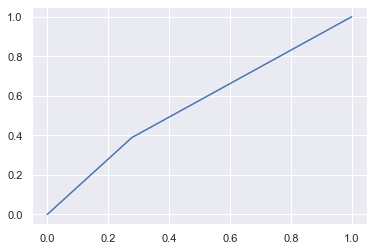

In [282]:
plt.plot(fpr2,tpr2)

Text(0.5, 1.0, 'ROC curve')

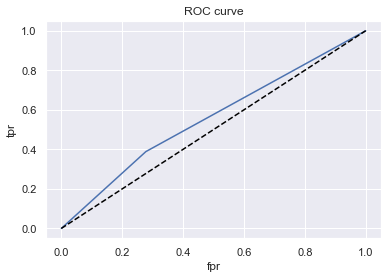

In [283]:
plt.plot(fpr2,tpr2)
plt.plot(fpr2,fpr2,linestyle = '--', color = 'black')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

In [284]:
AUroc = roc_auc_score(df_actual_predicted_probs2['customer_target_temp'],df_actual_predicted_probs2['y_hat_test_new'])
AUroc

0.5554292929292929

In [285]:
# We find the roc_area under the curve score is not improving, rather declining after reducing significant amount of predictors.

In [286]:
# Below is the clasification report along with accuracy for both set of predictors

In [287]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(df_actual_predicted_probs2['customer_target_temp'],df_actual_predicted_probs2['y_hat_test_new'])
print("Confusion Matrix:")
print(result)
result1 = classification_report(df_actual_predicted_probs2['customer_target_temp'],df_actual_predicted_probs2['y_hat_test_new'])
print("Classification Report:",)
print (result1)
result2 = accuracy_score(df_actual_predicted_probs2['customer_target_temp'],df_actual_predicted_probs2['y_hat_test_new'])
print("Accuracy:",result2)

Confusion Matrix:
[[312 120]
 [269 171]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.72      0.62       432
           1       0.59      0.39      0.47       440

    accuracy                           0.55       872
   macro avg       0.56      0.56      0.54       872
weighted avg       0.56      0.55      0.54       872

Accuracy: 0.5538990825688074


In [288]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(df_actual_predicted_probs['customer_target_temp'],df_actual_predicted_probs['y_hat_test_new'])
print("Confusion Matrix:")
print(result)
result1 = classification_report(df_actual_predicted_probs['customer_target_temp'],df_actual_predicted_probs['y_hat_test_new'])
print("Classification Report:",)
print (result1)
result2 = accuracy_score(df_actual_predicted_probs['customer_target_temp'],df_actual_predicted_probs['y_hat_test_new'])
print("Accuracy:",result2)


Confusion Matrix:
[[268 164]
 [216 224]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.62      0.59       432
           1       0.58      0.51      0.54       440

    accuracy                           0.56       872
   macro avg       0.57      0.56      0.56       872
weighted avg       0.57      0.56      0.56       872

Accuracy: 0.5642201834862385


In [289]:
# Hence we conclude Logistic Regression is not a feasible model for predicting the dataset and try using random forest modelling in next aprt